#Метрики качества предсказания

##Confusion matrix (матрица ошибок)

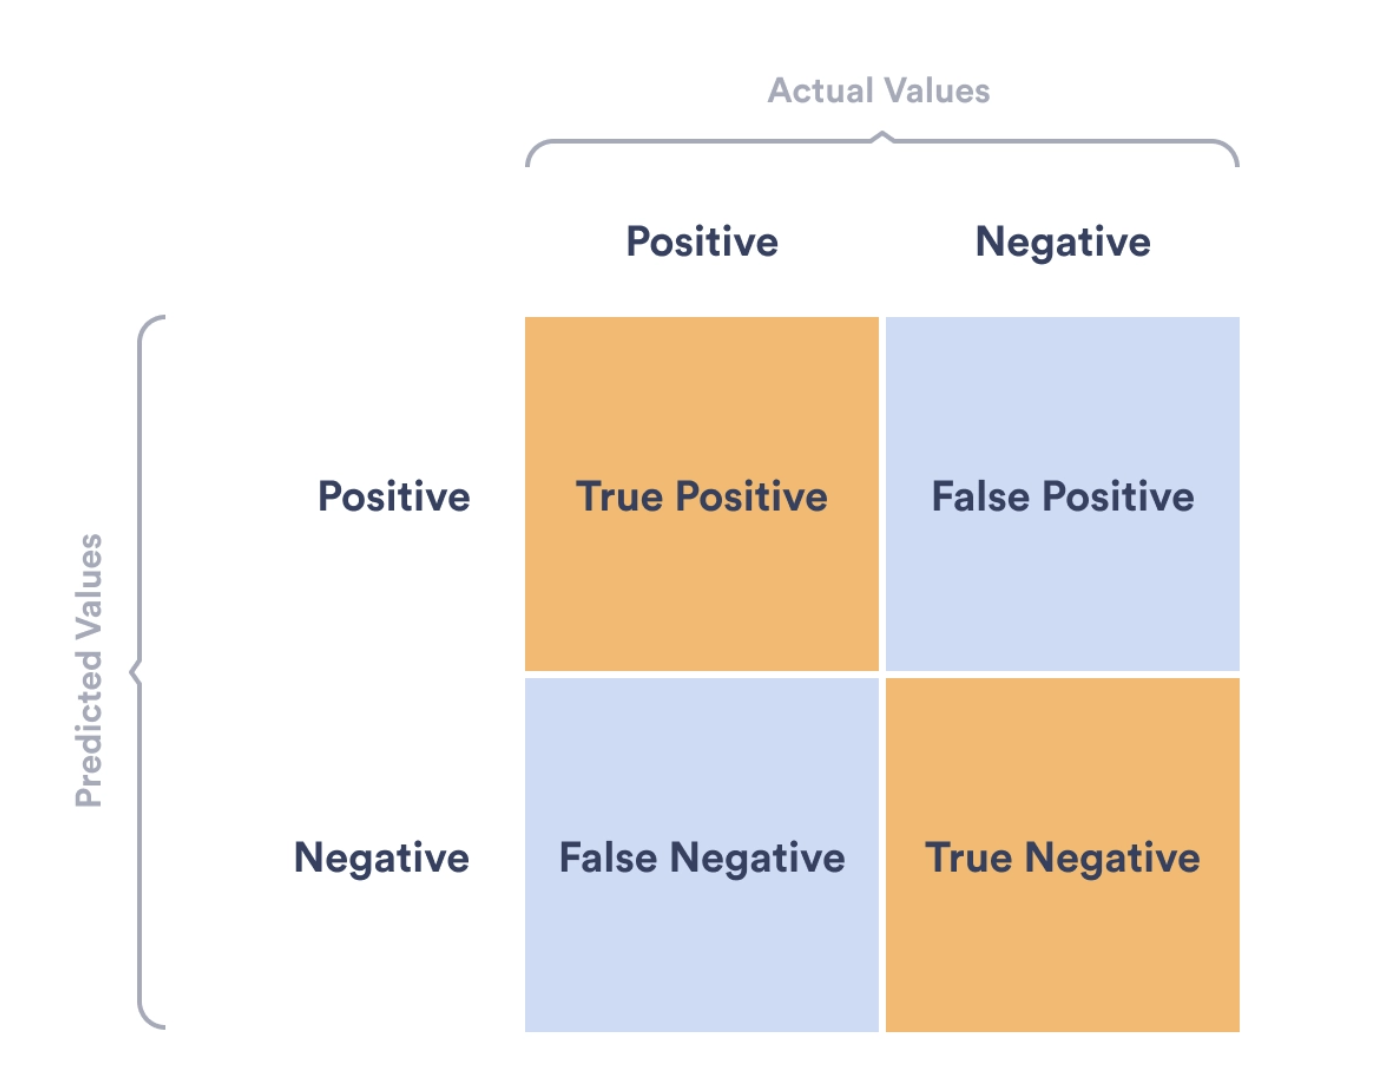

##Accuracy

**Точность** -- это количество правильных предсказаний.

$$Accuracy = \dfrac{TP+TN}{ALL}$$



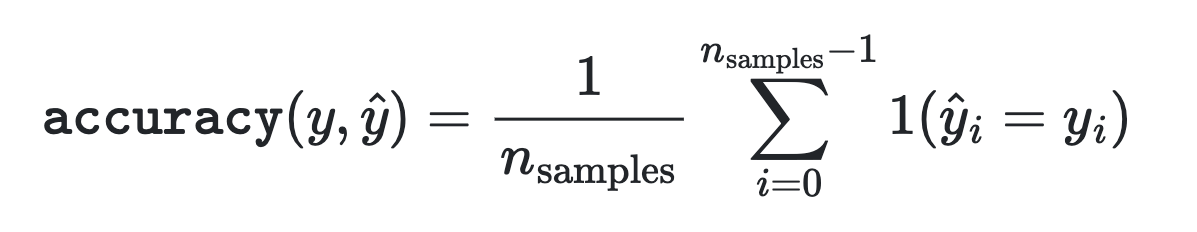

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
print(accuracy_score(y_true, y_pred))
print(accuracy_score(y_true, y_pred, normalize=False))

0.5
2


##Precision

**Точность** -- доля объектов, названных классификатором положительными и при этом действительно являющимися положительными.

$$precision = \dfrac{TP}{TP+FP}$$



In [ ]:
from sklearn.metrics import precision_score

y_true = [[0, 0, 0], [1, 1, 1], [0, 1, 1]]
y_pred = [[0, 0, 0], [1, 1, 1], [1, 1, 0]]
precision_score(y_true, y_pred, average=None)

array([0.5, 1. , 1. ])

##Recall

**Полнота** -- это доля истинно положительных результатов.

Насколько хорошо модель умеет выявлять истинные значения среди всех.

$$recall = \dfrac{TP}{TP+FN}$$

In [ ]:
from sklearn.metrics import recall_score

# multilabel classification
y_true = [[0, 0, 0], [1, 1, 1], [0, 1, 1]]
y_pred = [[0, 0, 0], [1, 1, 1], [1, 1, 0]]
recall_score(y_true, y_pred, average=None)

array([1. , 1. , 0.5])

##F-мера

-- метрика, учитывающая и точность, и полноту.

$$F_{\beta} = (1+\beta^2)\cdot \dfrac{precision\cdot recall}{(\beta^2\cdot precision)+recall}$$

достигает максимума при полноте и точности, равными единице, и близка к нулю, если один из аргументов близок к нулю

Пример для задачи многоклассовой классификации:

In [ ]:
from sklearn.metrics import f1_score

y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]
print(f1_score(y_true, y_pred, average=None))
print(f1_score(y_true, y_pred, average='macro'))
print(f1_score(y_true, y_pred, average='weighted'))

print(f1_score(y_true, y_pred, average='micro'))

[0.8 0.  0. ]
0.26666666666666666
0.26666666666666666
0.3333333333333333


**без параметра** -- метрика считается по каждому классу отдельно

**macro** -- усреднение итоговых метрик, в котором каждому классу присваивается одинаковый вес.

**weighted** -- учитывается дисбаланс классов (больший вес у класса с большим числом объектов)

*вопрос: что делает micro?*

##ROC-AUC кривая
-- это кривая от (0, 0) до (1, 1) в координатах True Positive Rate (TPR) и False Positive Rate (FPR).

Способ оценить модель в целом.

Area Under Curve - Reciever Operating Characteristic curve.

$$TPR = \dfrac{TP}{TP+FN} = recall$$


$$FPR = \dfrac{FP}{FP+TN}$$,
то есть какую долю объектов из negative класса алгоритм предсказал неверно.


In [ ]:
import numpy as np
from sklearn import metrics
y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)
print(fpr)
print(tpr)
print(thresholds)

[0.  0.  0.5 0.5 1. ]
[0.  0.5 0.5 1.  1. ]
[1.8  0.8  0.4  0.35 0.1 ]


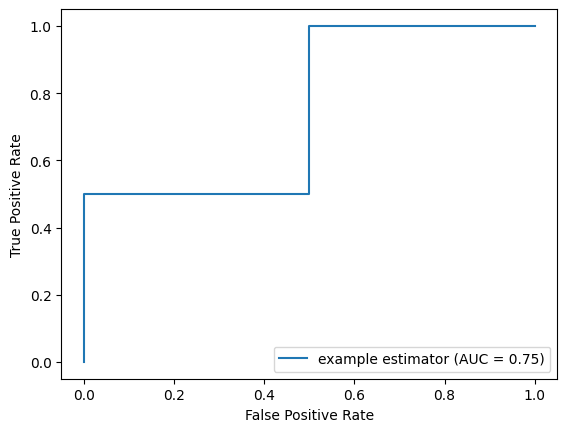

In [ ]:
import matplotlib.pyplot as plt

y = np.array([0, 0, 1, 1])
pred = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='example estimator')
display.plot()
plt.show()


**Задание**

1. Сами создайте простой датасет из y_pred и y_true и посчитайте на нем все метрики и постройте ROC-AUC кривую.

2. [Тут](https://www.kaggle.com/code/desalegngeb/heart-disease-predictions/input) Подгрузите себе данные о сердечных заболеваниях людей. Посмотрите на данные, из чего они состоят, какие етсь признаки. Нужная вам колонка -- это колонка target. В ней 1 означает, что у человека есть сердечное заболевание. 0 -- нет. Теперь рандомно сгенерируйте еще один столбец в датасет, который будет служить "предсказанием вашей модели" о наличии заболевания у человека. Посчитайте все метрики и постройте ROC-AUC кривую вашего предсказания.

In [ ]:
from sklearn.metrics import confusion_matrix

<...>